In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [22]:
train= pd.read_csv('train.csv')

In [24]:
train.shape

(381109, 12)

In [12]:
test=pd.read_csv('test.csv')

In [14]:
test.shape

(127037, 11)

In [16]:
submission=pd.read_csv('sample_submission.csv')

In [18]:
submission.shape

(127037, 2)

In [28]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [30]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [34]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [36]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [38]:
test.nunique()

id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64

In [40]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [53]:
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [57]:
submission.Response.value_counts()

Response
0    127037
Name: count, dtype: int64

In [59]:
train.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

<Axes: xlabel='Driving_License', ylabel='Response'>

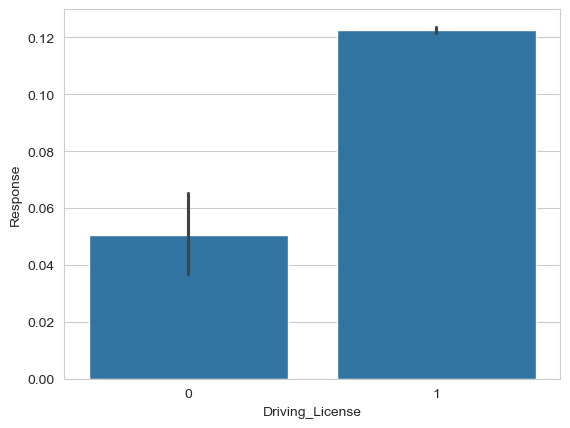

In [67]:
sns.barplot(x='Driving_License', y='Response',data=train)

In [69]:
train.Previously_Insured.value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

<Axes: xlabel='Previously_Insured', ylabel='Response'>

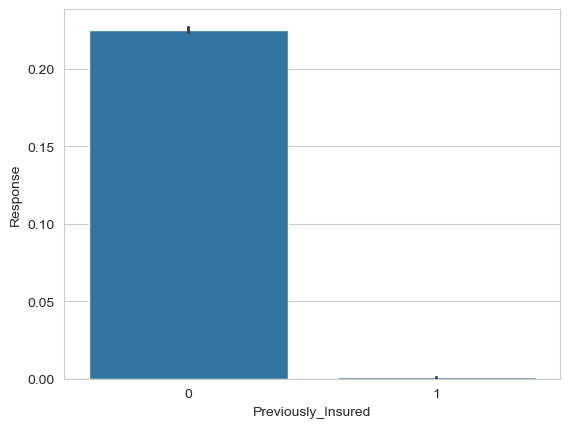

In [73]:
sns.barplot(x='Previously_Insured',y='Response',data=train)

In [75]:
train.Gender.value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [79]:
train[(train['Gender'] == 'Male') & (train['Response'] == 1)]['id'].count()*100/train[train['Gender'] == 'Male']['id'].count()

13.841107482689518

In [81]:
train[(train['Gender'] == 'Female') & (train['Response'] == 1)]['id'].count()*100/train[train['Gender'] == 'Female']['id'].count()

10.390241115301109

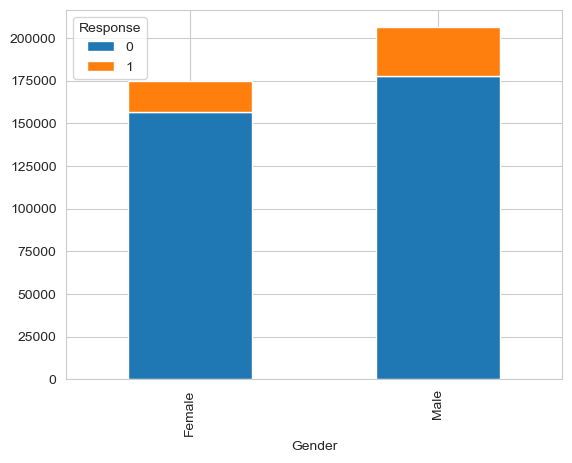

In [89]:
train.groupby(['Gender','Response']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

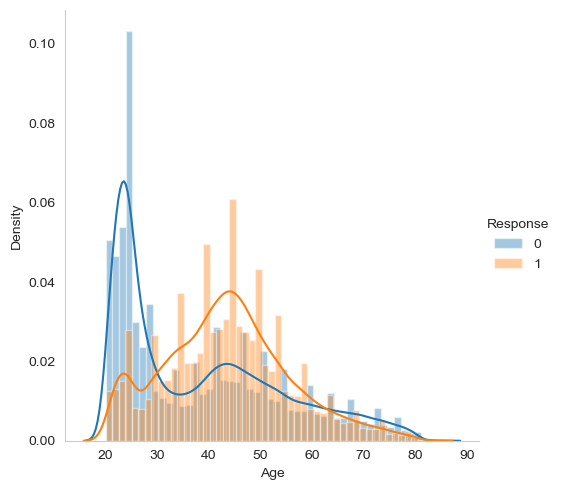

In [91]:
sns.FacetGrid(data = train, hue = 'Response', height = 5).map(sns.distplot, 'Age').add_legend()
plt.grid()
plt.show()

<Axes: xlabel='Driving_License'>

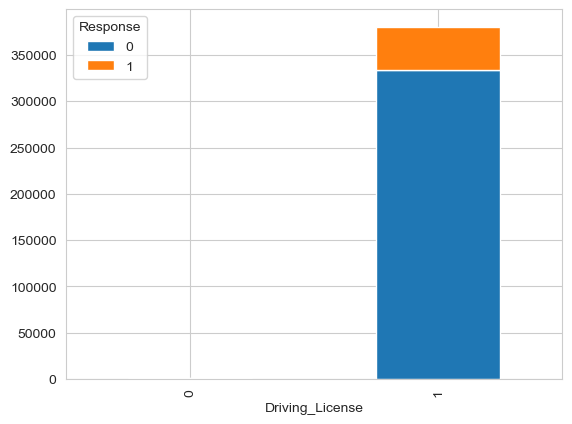

In [93]:
train.groupby(['Driving_License', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

<Axes: xlabel='Previously_Insured'>

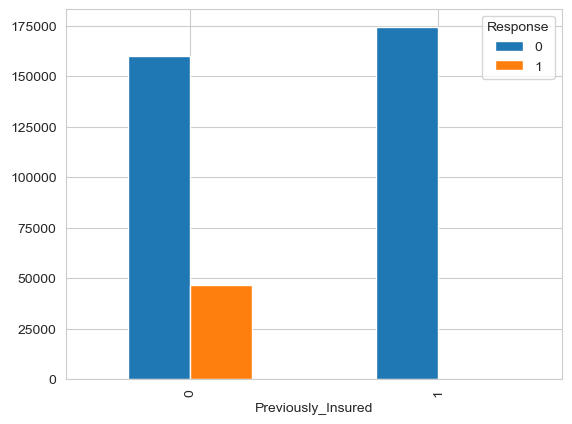

In [95]:
train.groupby(['Previously_Insured', 'Response']).size().unstack().plot(kind = 'bar')

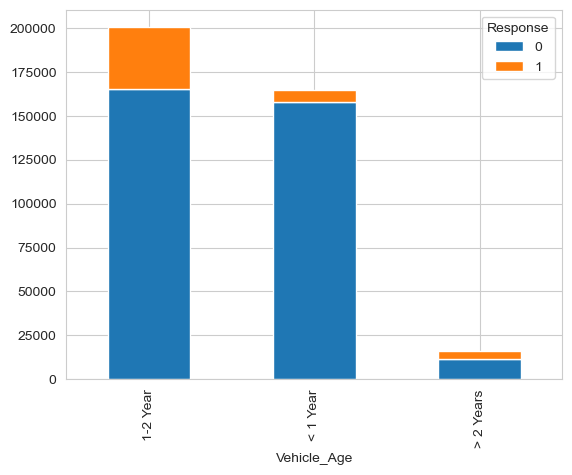

In [97]:
train.groupby(['Vehicle_Age','Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

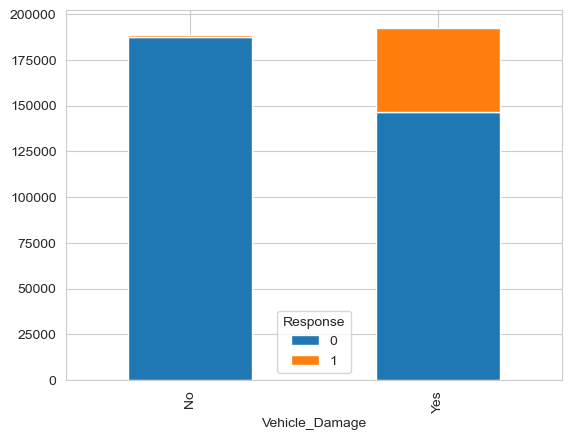

In [99]:
train.groupby(['Vehicle_Damage', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [101]:
train.Annual_Premium.value_counts()

Annual_Premium
2630.0      64877
69856.0       140
39008.0        41
38287.0        38
45179.0        38
            ...  
14838.0         1
52535.0         1
15182.0         1
143525.0        1
69845.0         1
Name: count, Length: 48838, dtype: int64

In [103]:
train.Annual_Premium.describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [105]:
train.Policy_Sales_Channel.value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

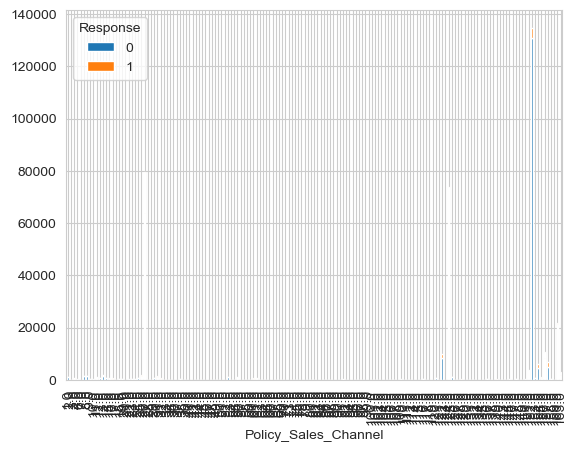

In [111]:
train.groupby(['Policy_Sales_Channel', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [107]:
train.Age.value_counts()

Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64

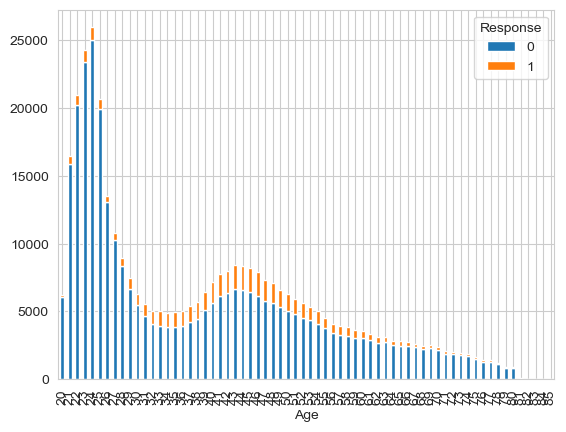

In [109]:
train.groupby(['Age', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

<Axes: >

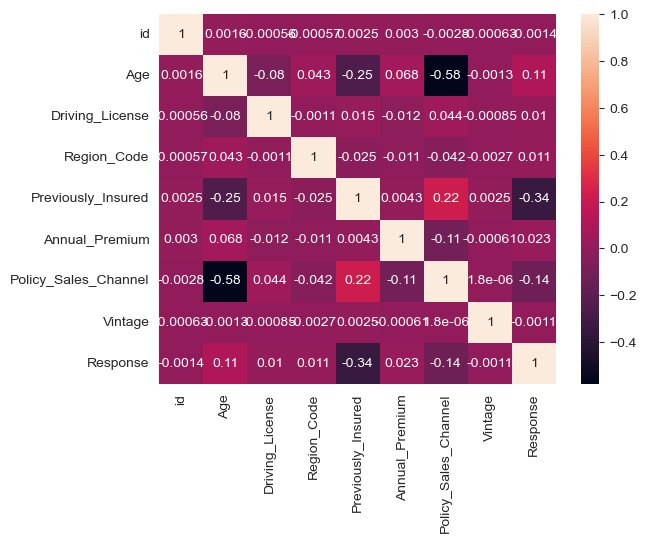

In [113]:
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot = True)